In [1]:
import math 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 20

In [3]:
# Set Parameters.
g = 9.81
v_t = 4.9
c_d = 1.0/5.0
c_l = 1.0

# Set initial conditions.
v_0 = 6.5
theta_0 = -0.1
x_0 = 0.0
y_0 = 2.0

In [9]:
def rhs_phugoid(u, c_l, c_d, g, v_t):
    v, theta, x, y = u
    rhs = np.array([-g*math.sin(theta) - c_d/c_l*g/v_t**2*v**2,
                    -g*math.cos(theta)/v+g / v_t**2*v,
                   v*math.cos(theta),
                   v*math.sin(theta)])
    return rhs

def euler_step(u, f, dt, *args):
    u_new = u + dt *f(u, *args)
    return u_new

def l1_diff(u_coarse, u_fine, dt):
    N_coarse = u_coarse.shape[0]
    N_fine = u_fine.shape[0]
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt* np.sum(np.abs(u_coarse - u_fine[::ratio]))
    return diff

In [12]:
def rk2_step(u, f, dt, *args):
    u_star = u + 0.5 * dt * f(u, *args)
    u_new = u + dt * f(u_star, *args)
    return u_new

In [13]:
T = 30 
dt = 0.01
N = int(T/dt) + 1

# Create arrays to store the solution at each time step.
u_euler = np.empty((N,4))
u_rk2 = np.empty((N,4))

# Set the initial conditions.
u_euler[0] = np.array([v_0, theta_0, x_0, y_0])
u_rk2[0] = np.array([v_0, theta_0, x_0, y_0])

# Time integration with both method.
for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], rhs_phugoid, dt,
                               c_l, c_d, g, v_t)
    u_rk2[n + 1] = rk2_step(u_rk2[n], rhs_phugoid, dt,
                           c_l, c_d, g, v_t)
    

In [14]:
# Get the glider's postion over the time.
x_euler = u_euler[:, 2]
y_euler = u_euler[:, 3]
x_rk2 = u_rk2[:, 2]
y_rk2 = u_rk2[:, 3]

In [15]:
# Get the index of the first negative element fo y_euler.
idx_negative_euler = np.where(y_euler < 0.0)[0]
if len(idx_negative_euler) == 0:
    idx_ground_euler = N - 1
    print('[Euler] Glider has not touched ground yet!')
else:
    idx_ground_euler = idx_negative_euler[0]
# Get the index of the first negative element of y_rk2.
idx_negative_rk2 = np.where(y_rk2 < 0.0)[0]
if len(idx_negative_rk2) == 0:
    idx_ground_rk2 = N -1
    print('[RK2] Glider has not touched ground yet!')
else:
    idx_ground_rk2 = idx_negative_rk2[0]

In [16]:
#Check if to two scheme leads to the same numerical solution.
print('Are the x-values close? {}'.format(np.allclose(x_euler, x_rk2)))
print('Are the y-values close? {}'.format(np.allclose(y_euler, y_rk2)))

Are the x-values close? False
Are the y-values close? False


Distance traveled: 14.516


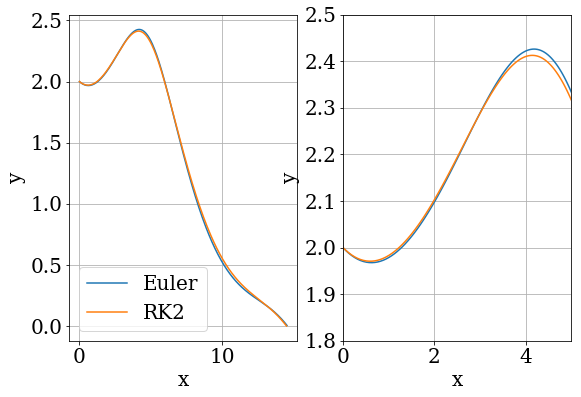

In [17]:
print('Distance traveled: {:.3f}'.format(x_rk2[idx_ground_rk2 - 1]))

# Plot the glider's path for both schemes.
plt.figure(figsize = (9.0, 6.0))
plt.subplot(121)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler],
        label='Euler')
plt.plot(x_rk2[:idx_ground_rk2], y_rk2[:idx_ground_rk2],
        label='RK2')
plt.legend();
# Let's take a closer look!
plt.subplot(122)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_euler, y_euler, label='Euler')
plt.plot(x_rk2, y_rk2, label='RK2')
plt.xlim(0.0, 5.0)
plt.ylim(1.8, 2.5);

In [21]:
# Set thelist of time-step sizes to investigate.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

# Create an empty list to store the solution for each time-step size.
u_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time steps
    # Set initial conditions.
    u = np.empty((N, 4))
    u[0] = np.array([v_0, theta_0, x_0, y_0])
    # Time integration using RK2 method.
    for n in range(N - 1):
        u[n + 1] = rk2_step(u[n], rhs_phugoid, dt, c_l, c_d, g, v_t)
    u_values.append(u)